[0.40994600410505416, 0.42830202437529913, 0.40079615248686445, 0.39838100504248397, 0.4159379875898487, 0.42694113063876765, 0.3986864314181014, 0.40615186596348857, 0.41006152882030483, 0.3947601486545677]


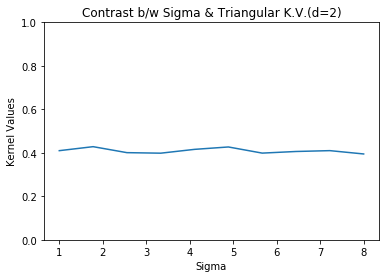

In [2]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=2

def triangular_kernel(distances,p,sigma=1.0): 
    kernel_vals = 1-((distances/sigma))
    return kernel_vals 

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=np.linspace(1,8,10)
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)

    
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = triangular_kernel(distances_from_farthest_centroid[i],sigma)
        kernel_vals_for_nearest_centroid[i] = triangular_kernel(distances_from_nearest_centroid[i],sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
print(final_kernel_vals)
fig,ax=plt.subplots()
ax.set_title("Contrast b/w Sigma & Triangular K.V.(d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
ax.set_ylim(0.0,1.0)
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and Triangular Kernel Values for dim 2')
plt.show()








[0.16928899886906326, 0.19107192155593133, 0.146580702631434, 0.14080924129371622, 0.3658711770545016, 0.8392670561988829, 0.4978147693029202, 0.4848695702330133, 0.29063585320339835, 0.2125050189913523]


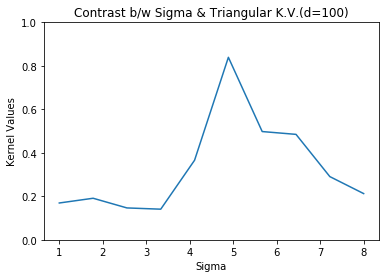

In [6]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=100

def triangular_kernel(distances,p,sigma=1.0): 
    kernel_vals = 1-((distances/sigma))
    return kernel_vals 

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=np.linspace(1,8,10)
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)

    
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = triangular_kernel(distances_from_farthest_centroid[i],sigma)
        kernel_vals_for_nearest_centroid[i] = triangular_kernel(distances_from_nearest_centroid[i],sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
print(final_kernel_vals)
fig,ax=plt.subplots()
ax.set_title("Contrast b/w Sigma & Triangular K.V.(d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
ax.set_ylim(0.0,1.0)
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and Triangular Kernel Values for dim 100')
plt.show()







